In [21]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="whitegrid")
import json
import numpy as np
import pandas as pd

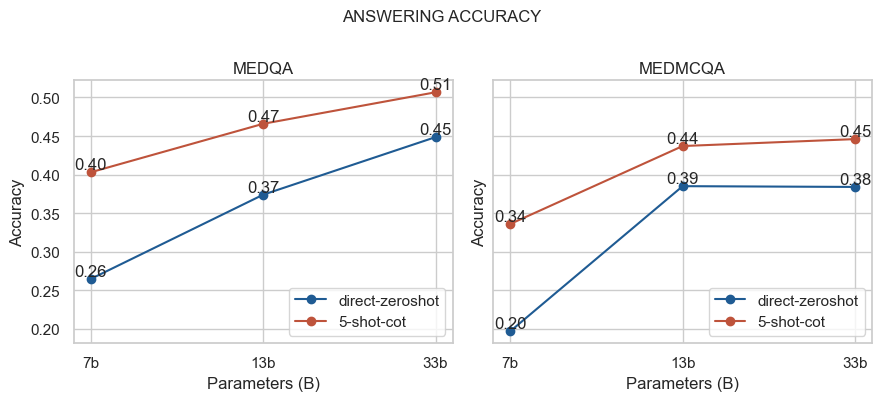

In [2]:
dates = ["2023-07-03", "2023-07-04"]
path_to_exps = Path("~/Research/meluxina/medical-reasoning").expanduser()
exps = ["direct-zeroshot", "5-shot-cot"]
models = ["vicuna-7b", "vicuna-13b", "vicuna-33b"]
datasets = ["medqa", "medmcqa"]

x = ["7b", "13b", "33b"]
x_ticks = np.arange(len(x))

fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharey="row", sharex="col")
fig.suptitle("ANSWERING ACCURACY", fontsize=12, y=1.0)

niceblue = "#1F5B93"
nicered = "#BE533B"
colors = [niceblue, nicered]

for i, dset in enumerate(datasets):
    ax = axes[i]

    for k, exp in enumerate(exps):
        y_values = []  # Store the accuracy values for each model
        for model_name in models:
            path = path_to_exps / exp / dset / model_name / dates[k]
            with open(path / 'results.json') as f:
                data = json.load(f)
                accuracy = float(data["accuracy"])
                y_values.append(accuracy)

        ax.plot(x_ticks, y_values, marker='o', label=f"{exp}", color=colors[k])  # Use exp as label, and change color index to k
        for j, acc in enumerate(y_values):
            ax.text(x_ticks[j], acc, f"{acc:.2f}", ha='center', va='bottom')

    ax.set_xlabel("Parameters (B)")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"{dset.upper()}")
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x)
    ax.legend(loc="lower right")

plt.tight_layout()
plt.savefig("med-acc-k40.png", dpi=600)
plt.show()

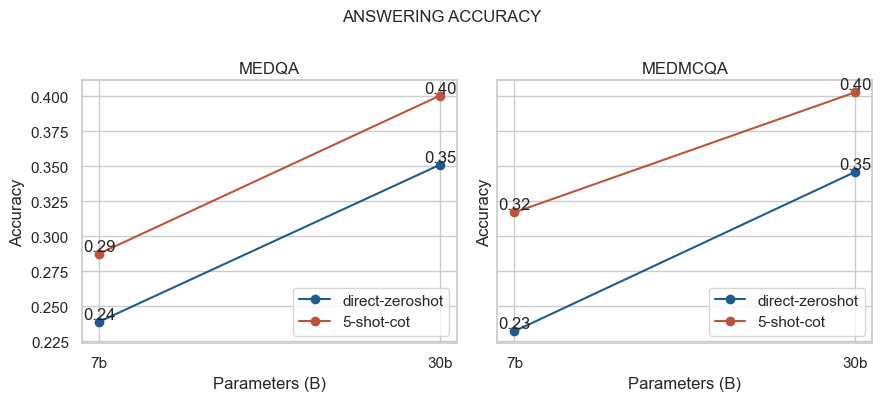

In [4]:
dates = ["2023-07-04", "2023-07-04"]
path_to_exps = Path("~/Research/meluxina/medical-reasoning").expanduser()
exps = ["direct-zeroshot", "5-shot-cot"]
models = ["mpt-instruct-7b", "mpt-instruct-30b"]
datasets = ["medqa", "medmcqa"]

x = ["7b", "30b"]
x_ticks = np.arange(len(x))

fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharey="row", sharex="col")
fig.suptitle("ANSWERING ACCURACY", fontsize=12, y=1.0)

niceblue = "#1F5B93"
nicered = "#BE533B"
colors = [niceblue, nicered]

for i, dset in enumerate(datasets):
    ax = axes[i]

    for k, exp in enumerate(exps):
        y_values = []  # Store the accuracy values for each model
        for model_name in models:
            path = path_to_exps / exp / dset / model_name / dates[k]
            with open(path / 'results.json') as f:
                data = json.load(f)
                accuracy = float(data["accuracy"])
                y_values.append(accuracy)

        ax.plot(x_ticks, y_values, marker='o', label=f"{exp}", color=colors[k])  # Use exp as label, and change color index to k
        for j, acc in enumerate(y_values):
            ax.text(x_ticks[j], acc, f"{acc:.2f}", ha='center', va='bottom')

    ax.set_xlabel("Parameters (B)")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"{dset.upper()}")
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x)
    ax.legend(loc="lower right")

plt.tight_layout()
plt.savefig("med-acc-k40.png", dpi=600)
plt.show()

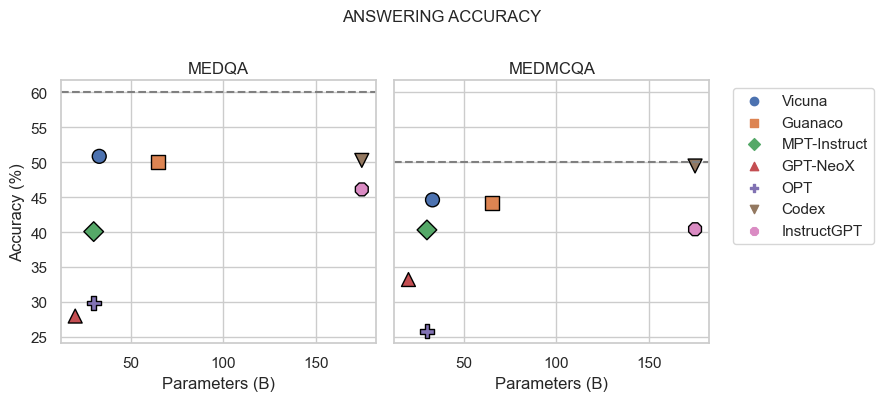

In [29]:
experiments = {
    "medqa": {
        "models": ["Vicuna", "Guanaco", "MPT-Instruct", "GPT-NeoX", "OPT", "Codex", "InstructGPT"],
        "acc": [50.83, 50.04, 40.06, 27.97, 29.83, 50.25, 46.10],
        "params": [33, 65, 30, 20, 30, 175, 175]
    },
    "medmcqa": {
        "models": ["Vicuna", "Guanaco", "MPT-Instruct", "GPT-NeoX", "OPT", "Codex", "InstructGPT"],
        "acc": [44.60, 44.10, 40.30, 33.20, 25.80, 49.45, 40.40],
        "params": [33, 65, 30, 20, 30, 175, 175]
    }
}

fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharey="row", sharex="col")
fig.suptitle("ANSWERING ACCURACY", fontsize=12, y=1.0)

# Plot for "medqa"
ax1 = sns.scatterplot(
    x="params",
    y="acc",
    hue="models",
    style="models",
    markers=["o", "s", "D", "^", "P", "v", "8"],  # Specify custom marker symbols
    s=100,  # Increase symbol size
    edgecolor="black",  # Set edge color for symbols
    linewidth=1,  # Adjust edge width
    data=pd.DataFrame(experiments["medqa"]),
    ax=axes[0]
)
axes[0].set_title("MEDQA")
ax1.set_xlabel("Parameters (B)")  # Set x-axis label with units
ax1.set_ylabel("Accuracy (%)")  # Set y-axis label with units
ax1.legend_.remove()
ax1.axhline(y=60, color='gray', linestyle='--')  # Add dotted grey line at 60%

# Plot for "medmcqa"
ax2 = sns.scatterplot(
    x="params",
    y="acc",
    hue="models",
    style="models",
    markers=["o", "s", "D", "^", "P", "v", "8"],  # Specify custom marker symbols: "v", "H", "X", "d", "8"
    s=100,  # Increase symbol size
    edgecolor="black",  # Set edge color for symbols
    linewidth=1,  # Adjust edge width
    data=pd.DataFrame(experiments["medmcqa"]),
    ax=axes[1]
)
axes[1].set_title("MEDMCQA")
ax2.set_xlabel("Parameters (B)")  # Set x-axis label with units
ax2.axhline(y=50, color='gray', linestyle='--')  # Add dotted grey line at 50%
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend box to the right outside the subplot


plt.tight_layout()
plt.savefig("med-leaderboard-k40.png", dpi=600)
plt.show()
